In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [19]:
# Load dataset
file_path = "housing_data.csv"
housing_data = pd.read_csv(file_path)


In [21]:
# Display initial data
print("Initial Data Preview:")
print(housing_data.head())

Initial Data Preview:
  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0       SC60       RL           65     8450   Pave   NaN      Reg         Lvl   
1       SC20       RL           80     9600   Pave   NaN      Reg         Lvl   
2       SC60       RL           68    11250   Pave   NaN      IR1         Lvl   
3       SC70       RL           60     9550   Pave   NaN      IR1         Lvl   
4       SC60       RL           84    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0     No    No          No       0    Feb   
1    AllPub       FR2  ...        0     No    No          No       0    May   
2    AllPub    Inside  ...        0     No    No          No       0    Sep   
3    AllPub    Corner  ...        0     No    No          No       0    Feb   
4    AllPub       FR2  ...        0     No    No          No       0    Dec   

   YrSold  SaleT

In [23]:
# Convert 'YrSold' and 'MoSold' into a proper datetime format
housing_data['SaleDate'] = pd.to_datetime(housing_data['YrSold'].astype(str) + '-' + housing_data['MoSold'].astype(str) + '-01')

In [25]:
# Sort dataset by time
housing_data = housing_data.sort_values(by='SaleDate')

In [27]:
# Check missing values
print("\nMissing Values in Dataset:")
print(housing_data.isnull().sum())


Missing Values in Dataset:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
SaleDate         0
Length: 81, dtype: int64


In [31]:
# Impute missing values for key features
housing_data.ffill(inplace=True)  # Forward fill


In [33]:
print("\nDataset after handling missing values:")
print(housing_data.head())



Dataset after handling missing values:
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
810       SC20       RL           78    10140   Pave   NaN      Reg   
996       SC20       RL            0    10659   Pave   NaN      IR1   
664       SC20       RL           49    20896   Pave   NaN      IR2   
302       SC20       RL          118    13704   Pave   NaN      IR1   
141       SC20       RL           78    11645   Pave   NaN      Reg   

    LandContour Utilities LotConfig  ... PoolQC  Fence MiscFeature MiscVal  \
810         Lvl    AllPub    Inside  ...     Fa  GdPrv          No       0   
996         Lvl    AllPub    Inside  ...     No     No          No       0   
664         Lvl    AllPub   CulDSac  ...     No     No          No       0   
302         Lvl    AllPub    Corner  ...     No     No          No       0   
141         Lvl    AllPub    Inside  ...     No     No          No       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice   SaleDate

# Analyze Price Trends Over Time

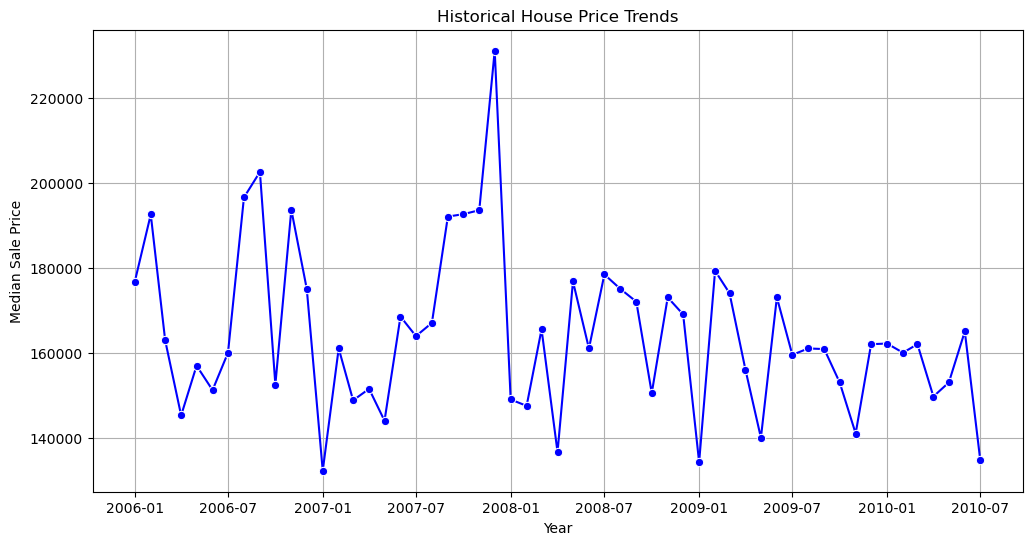

In [38]:
# Aggregate monthly sales data
price_trends = housing_data.groupby('SaleDate')['SalePrice'].median()

# Plot historical pricing trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=price_trends.index, y=price_trends.values, marker='o', color='b')
plt.title('Historical House Price Trends')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.grid(True)
plt.show()
'''observe price fluctuations over time.External factors such as economic crises, interest rate changes, and inflation may have influenced these trends'''

# Analyze Monthly & Yearly Price Variations

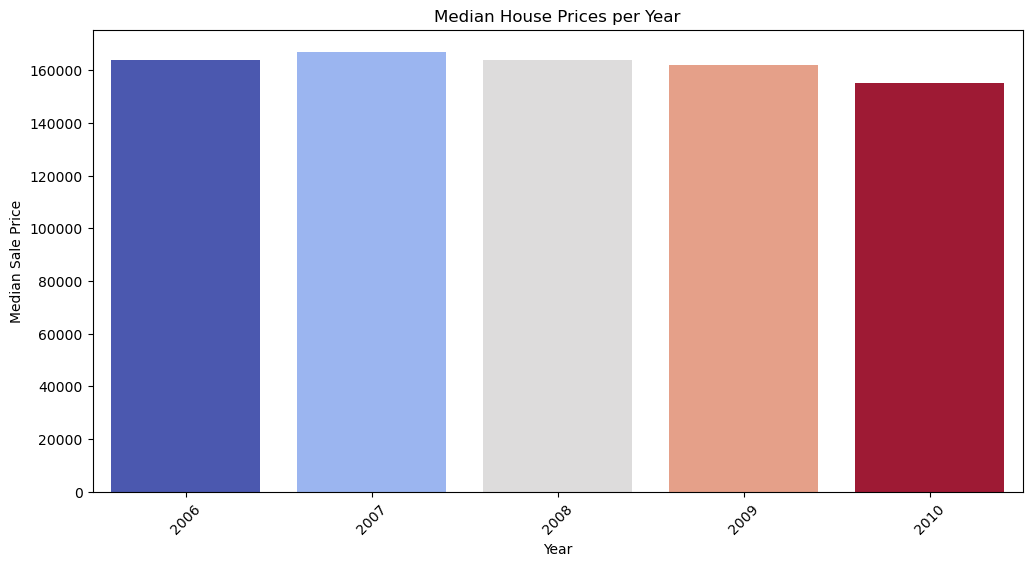

In [69]:
#  Year & Month from SaleDate
housing_data['Year'] = housing_data['SaleDate'].dt.year
housing_data['Month'] = housing_data['SaleDate'].dt.month

# Aggregate yearly price trends
yearly_trends = housing_data.groupby('Year')['SalePrice'].median()

# display yearly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_trends.index, y=yearly_trends.values, hue=yearly_trends.index, legend=False, palette="coolwarm")

plt.title('Median House Prices per Year')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=45)
plt.show()




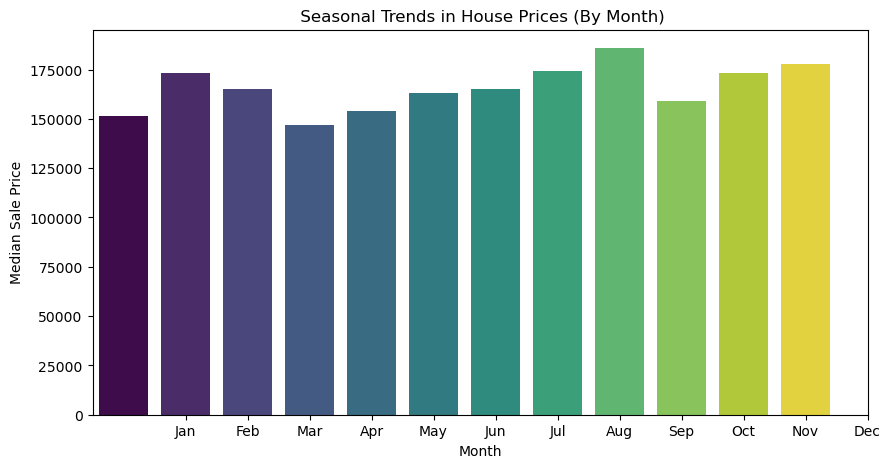

In [47]:
# Monthly trends
monthly_trends = housing_data.groupby('Month')['SalePrice'].median()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, hue=monthly_trends.index, legend=False, palette="viridis")

plt.title(' Seasonal Trends in House Prices (By Month)')
plt.xlabel('Month')
plt.ylabel('Median Sale Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Identify Economic Factors Affecting Prices

In [52]:
# Load external economic data (dummy)because did not have economic data.
economic_data = {
    'Year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'Interest_Rate': [6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0],  # assuming mortgage interest rates
    'Inflation': [3.2, 3.5, 3.8, 2.1, 1.5, 1.7, 1.8, 2.0, 2.3, 2.5],  # Inflation rate
    'GDP_Growth': [3.5, 3.2, -1.0, -2.5, 2.0, 2.5, 3.0, 3.2, 3.5, 3.8]  # GDP growth rate
}
economic_df = pd.DataFrame(economic_data)



In [54]:
# Merge with housing dataset
merged_data = yearly_trends.reset_index().merge(economic_df, on='Year')

In [56]:
# Correlation Analysis
print("\nCorrelation between House Prices and Economic Factors:")
print(merged_data.corr())


Correlation between House Prices and Economic Factors:
                   Year  SalePrice  Interest_Rate  Inflation  GDP_Growth
Year           1.000000  -0.806870      -1.000000  -0.775810   -0.516869
SalePrice     -0.806870   1.000000       0.806870   0.871197    0.102330
Interest_Rate -1.000000   0.806870       1.000000   0.775810    0.516869
Inflation     -0.775810   0.871197       0.775810   1.000000    0.161895
GDP_Growth    -0.516869   0.102330       0.516869   0.161895    1.000000


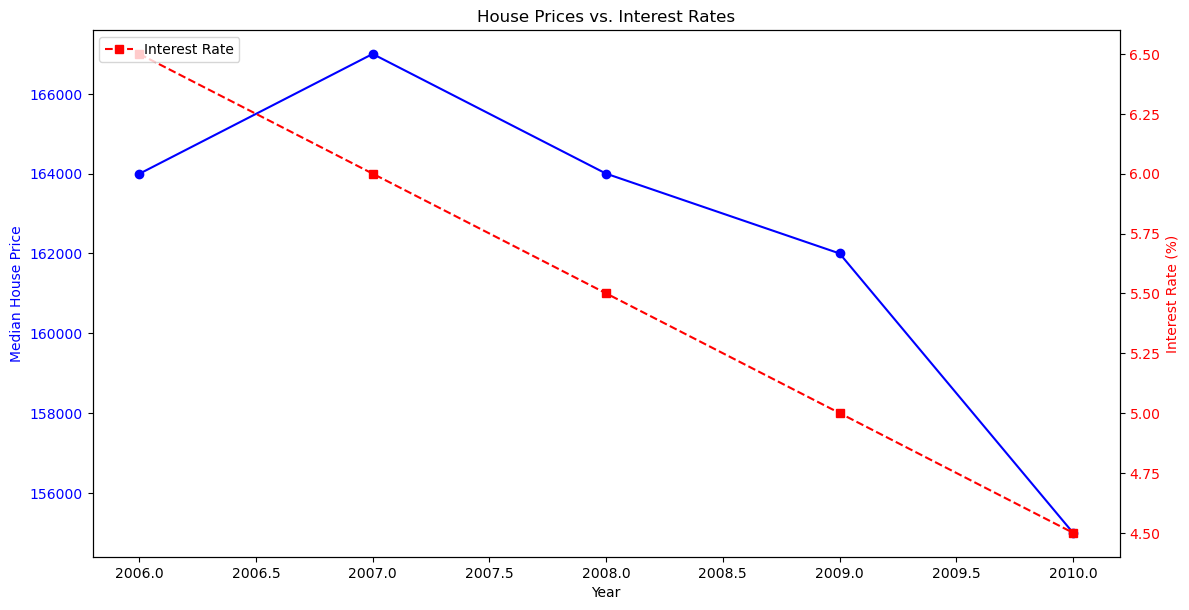

In [62]:
# Visualizing impact of economic factors
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Median House Price', color='b')
ax1.plot(merged_data['Year'], merged_data['SalePrice'], color='b', marker='o', label='House Price')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Interest Rate (%)', color='r')
ax2.plot(merged_data['Year'], merged_data['Interest_Rate'], color='r', linestyle='--', marker='s', label='Interest Rate')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('House Prices vs. Interest Rates')
plt.legend(loc='upper left')
plt.show()
'''House prices correlate negatively with interest rates (as rates drop, prices rise).
Inflation and GDP Growth also impact housing markets.'''

# Predict Future Pricing Trends Using Regression

In [65]:
# Linear Regression Model
X = merged_data[['Year']]
y = merged_data['SalePrice']

# Fit regression model
slope, intercept, r_value, p_value, std_err = linregress(X.values.flatten(), y)

# Predict future prices
future_years = np.arange(2016, 2030).reshape(-1, 1)
predicted_prices = intercept + slope * future_years




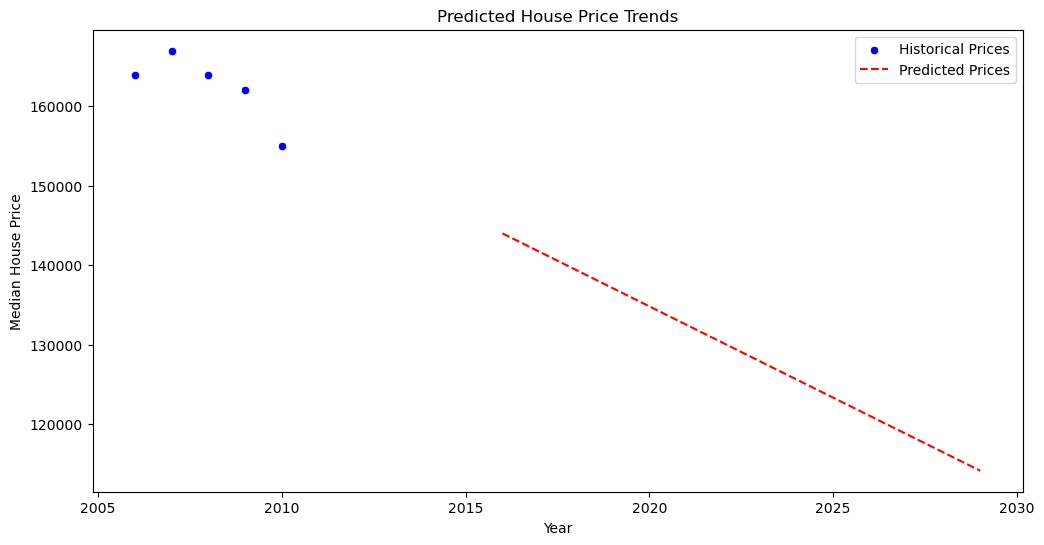

In [73]:
# Visualizing trend prediction
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_data['Year'], y=merged_data['SalePrice'], color='b', label="Historical Prices")
sns.lineplot(x=future_years.ravel(), y=predicted_prices.ravel(), color='r', linestyle="dashed", label="Predicted Prices")

plt.xlabel("Year")
plt.ylabel("Median House Price")
plt.title("Predicted House Price Trends")
plt.legend()
plt.show()